# Business Understanding
## Objective:
Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


## Tentang Organisasi:
HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

## Permasalahan:
HELP International telah berhasil mengumpulkan sekitar $10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

# The Data

## Data Understanding

In [ ]:
# keperluan general
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# keperluan Hopkins
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# keperluan K-Means
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# keperluan Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# keperluan DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
# load dataset
df = pd.read_csv('Data_Negara_HELP.csv')

# lihat data
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Dataset berisikan 10 kolom yang memiliki 167 sampel data. Detail dari masing-masing kolom dapat diuraikan sebagai berikut:

Atribut  | Keterangan
------------- | -------------
Negara | Nama negara
Kematian_anak | Kematian anak di bawah usia 5 tahun per 1000 kelahiran
Ekspor | Ekspor barang dan jasa perkapita
Kesehatan | Total pengeluaran kesehatan perkapita
Impor | Impor barang dan jasa perkapita
Pendapatan | Penghasilan bersih perorang
Inflasi | Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
Harapan_hidup | Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
Jumlah_fertiliti | Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
GDPperkapita | GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [ ]:
# melihat rangkuman data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Pembahasan:** <br>
Dari output di atas dapat diambil kesimpulan bahwa:
- Tipe data tiap kolom sudah sesuai sehingga tidak memerlukan adanya pengonversian tipe data. Tipe data yang ada juga dominan numerik dan hanya 1 (satu) kolom saja yang bertipe data objek sehingga dapat dipastikan tidak adanya proses encoding pada dataset ini.
- Tidak ada missing value dari data tiap kolom.

In [ ]:
# cek data kembar
df.duplicated().value_counts()

False    167
dtype: int64

**Pembahasan:** <br>
Tidak ditemukan juga adanya data yang kembar pada dataset.

In [ ]:
df['Ekspor'] = df['Ekspor'] * df['GDPperkapita']/100
df['Impor'] = df['Impor'] * df['GDPperkapita']/100
df['Kesehatan'] = df['Kesehatan'] * df['GDPperkapita']/100

df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


**Pembahasan:** <br>
Data dari kolom `Impor`, `Ekspor`, dan `Kesehatan` masih menyimpan nilai persentase sehingga untuk mendapatkan gambaran nilai yang lebih baik, akan dilakukan konversi dari nilai data tersebut menjadi nilai yang sebenarnya.

## Multivariate Analysis
Disini akan dilakukan Multivariate Analysis untuk mengeksplor keterhubungan antar banyak variabel pada dataset pada waktu yang sama. Eksplorasi akan dilakukan menggunakan visualisasi `pairplot` untuk melihat hubungan antar variabel dan `heatmap` untuk melihat nilai korelasi antar variabel.

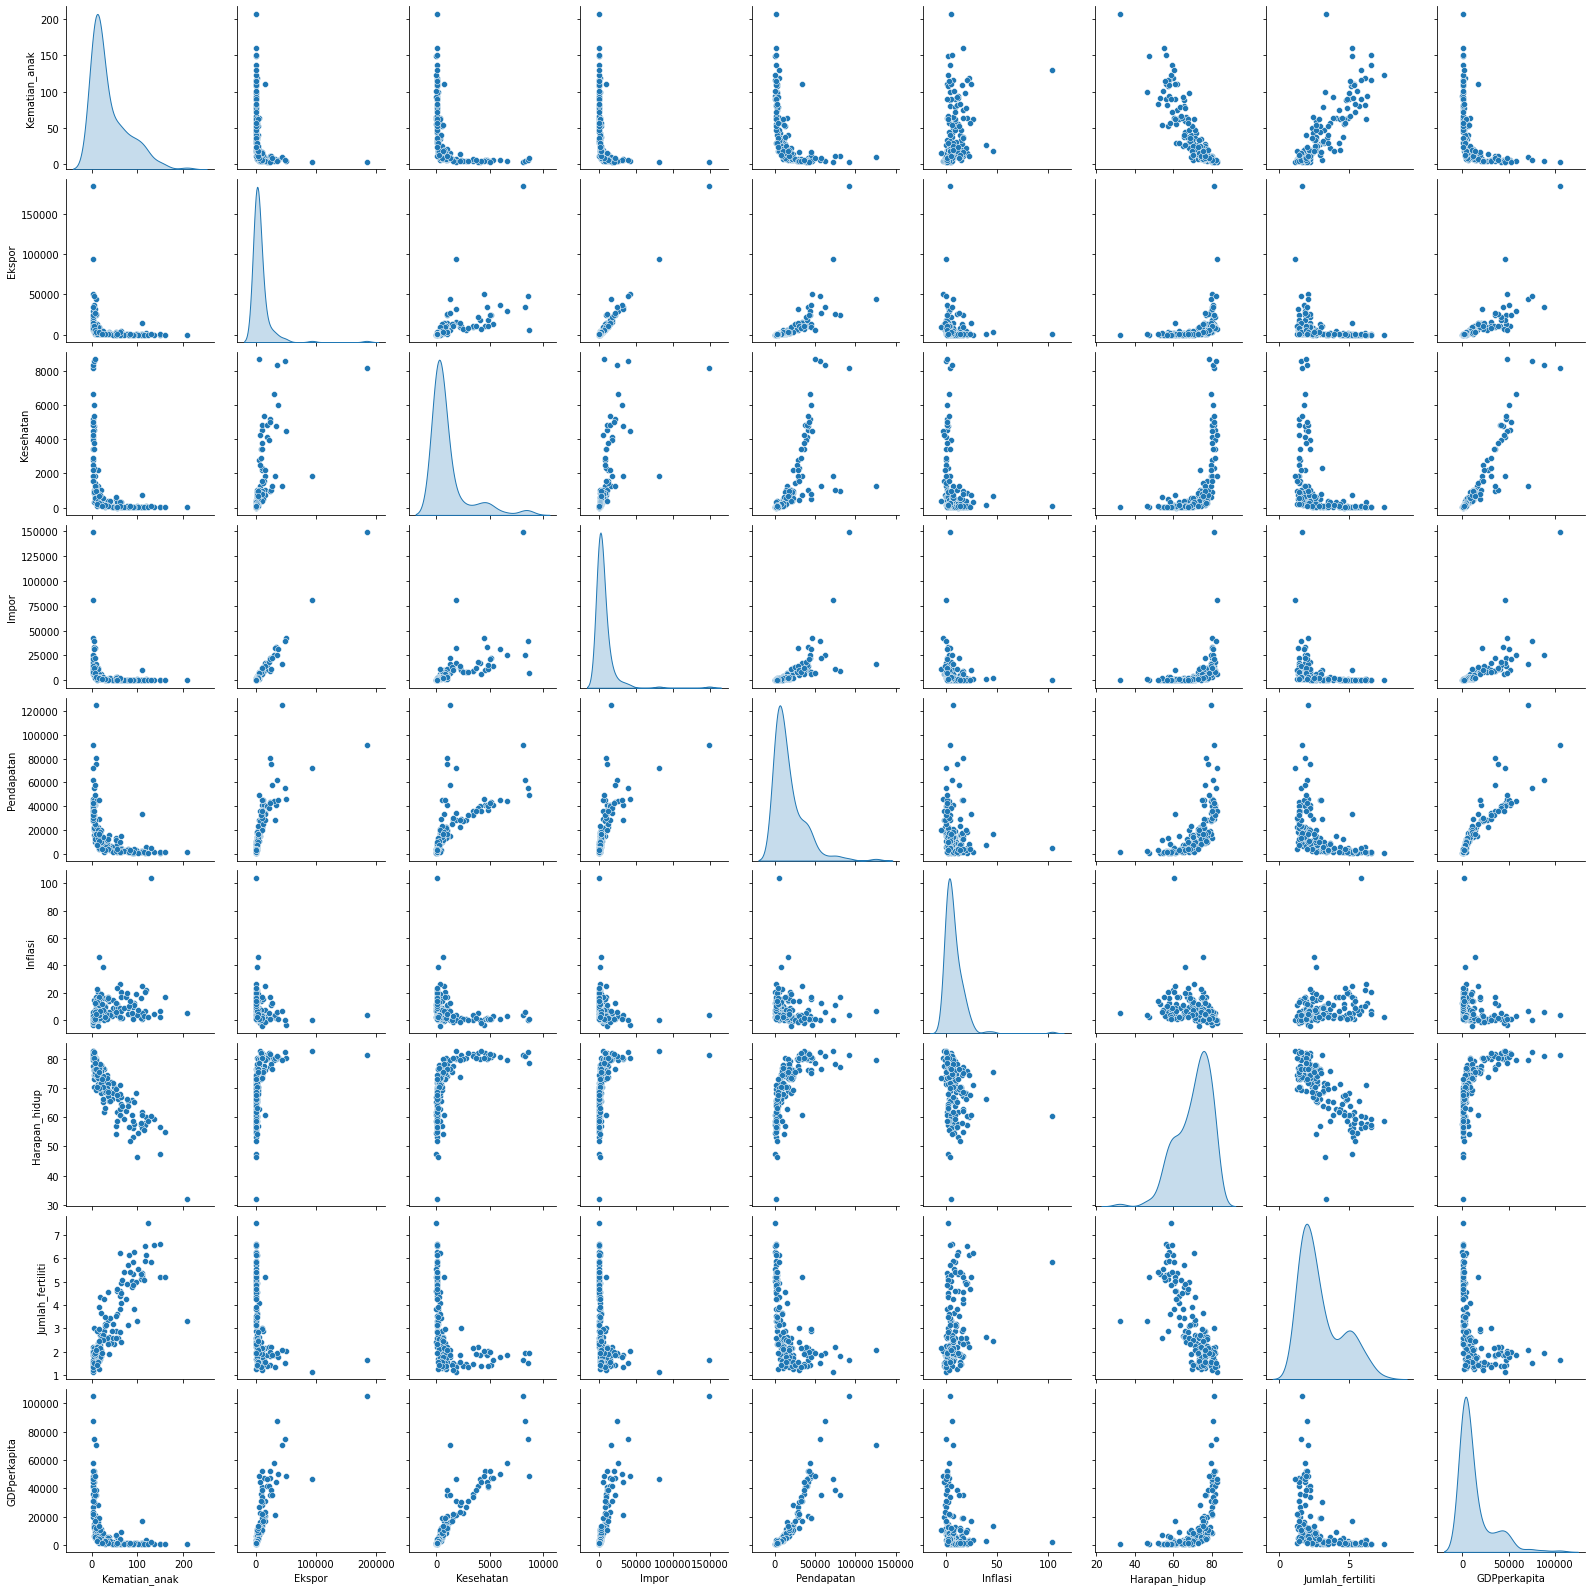

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Pembahasan:** <br>
Dari grafik di atas tertampil distribusi dari kolom itu sendiri dan hubungannya dengan kolom lain yang direpresentasikan dengan visualisasi `scatter`. Dapat dilihat bahwa data masih memiliki pencilan (outlier) dan tidak terdistribusi merata.

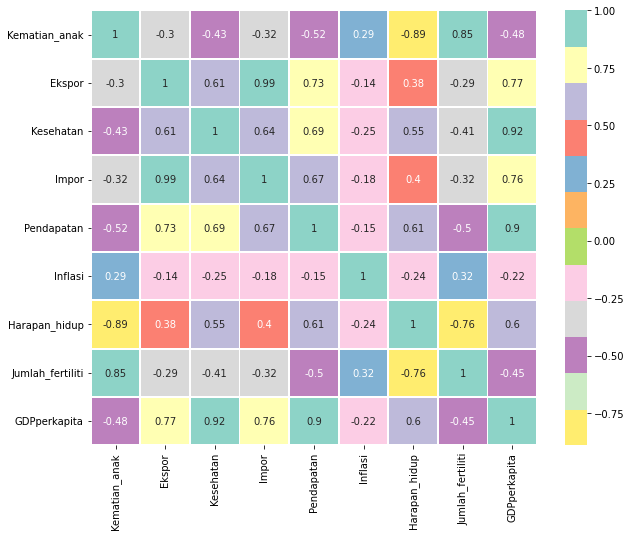

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='Set3_r', linewidths=1)
plt.show()

**Pembahasan:** <br>
Untuk melihat korelasi dengan lebih baik dibandingkan hanya melihat hubungan antar variabel dengan `scatter`, digunakan visualisasi dengan `heatmap` terhadap korelasi antar variabel. Sehingga nilai korelasi lebih mudah untuk dicerna dan ditarik kesimpulan. Pada korelasi ini juga, dipilih 2 variabel yang akan merepresentasikan keterhubungan antara faktor ekonomi dan kesehatan bukan antara ekonomi dengan ekonomi apalagi kesehatan dengan kesehatan. Sehingga terpilihlah variabel `Pendapatan` dengan `Harapan_hidup` sebagai variabel yang akan menjadi dasar dari analisis dan proses clustering nantinya. Kedua variabel tersebut memiliki korelasi `0.61` yang berarti terdapat hubungan korelasi positif yang kuat di antara keduanya.

## Univariate Analysis
Disini akan dilakukan eksplorasi terhadap suatu variabel tunggal. Eksplorasi akan dilakukan menggunakan visualisasi `histogram`, `boxplot`, dan `violinplot`. Histogram untuk melihat distribusi data, boxplot untuk melihat pencilan (outlier) data, dan violinplot untuk melihat bagaimana kerapatan serta pencilan (outlier) data.

In [ ]:
def univariate_analysis(col):
  fig, ax = plt.subplots(ncols=3, figsize=(16,6))
  ax = ax.flatten()
  
  sns.histplot(data=df, x=col, ax=ax[0], color='#80B1D3')
  ax[0].set_title("Distribution Plot")
  sns.boxplot(data=df, x=col, ax=ax[1], color='#FB8072')
  ax[1].set_title("Box Plot")
  sns.violinplot(data=df, x=col, ax=ax[2], color='#BC80BD')
  ax[2].set_title("Violin Plot")
  plt.show()

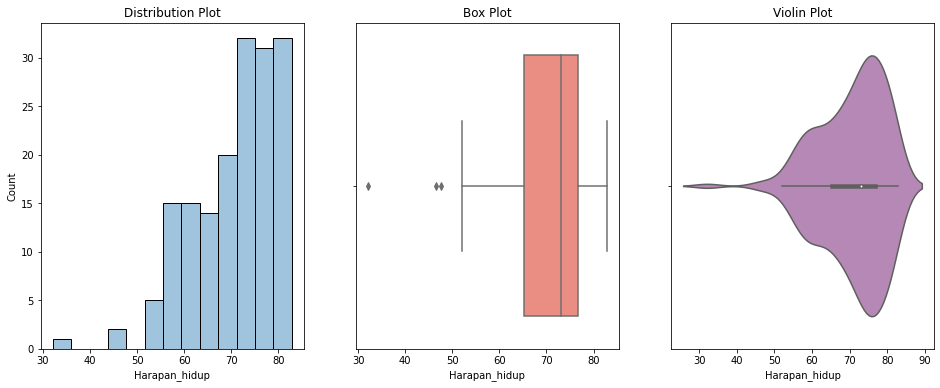

In [ ]:
univariate_analysis('Harapan_hidup')

**Pembahasan:** <br>
Dapat dilihat dari ketiga visualisasi di atas bahwa kolom `Harapan_hidup` tidak terdistribusi merata dan masih terdapat pencilan (outlier) di bawah nilai Q1 nya.

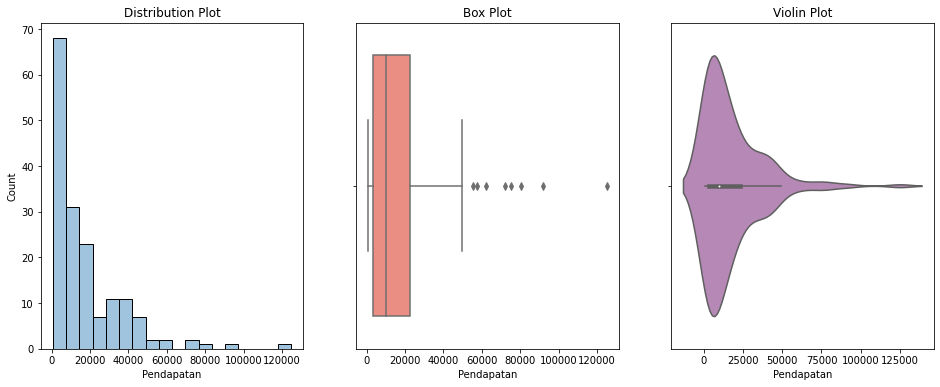

In [ ]:
univariate_analysis('Pendapatan')

**Pembahasan:** <br>
Dapat dilihat dari ketiga visualisasi di atas bahwa kolom `Pendapatan` tidak terdistribusi merata dan masih terdapat pencilan (outlier) di atas nilai Q3 nya.

## Bivariate Analysis
Disini akan dilakukan eksplorasi terhadap 2 variabel dengan menggunakan visualisasi `scatter` dan `barplot`. Scatter disini untuk melihat pola hubungan korelasi antara 2 variabel yang terpilih mengingat hasil visualisasi pada `pairplot` sebelumnya cenderung ramai sehingga sulit fokus pada masing-masing scatter. Barplot digunakan untuk membandingkan suatu data variabel dari terhadap variabel negara.

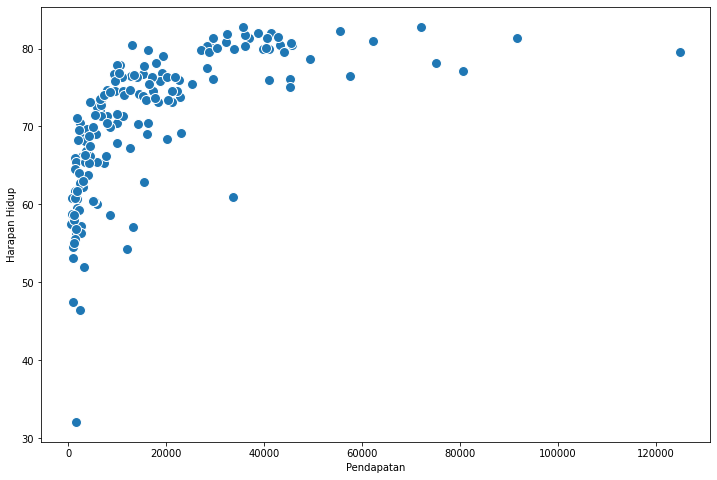

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['Pendapatan'], df['Harapan_hidup'], edgecolors='white', color='#1F77B4', s=100)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan Hidup')
plt.show()

**Pembahasan:** <br>
Output di atas merupakan hasil pola korelasi hubungan antara `Pendapatan` dengan `Harapan_hidup` dengan nilai `0.61` yaitu korelasi positif yang kuat.

In [ ]:
def visualize_country(y, ascending=True, x='Negara', df=df, n=10):
  plt.figure(figsize=(10,5))
  top = df[[x, y]].sort_values(y, ascending = ascending).head(n)
  ax = sns.barplot(x=x, y=y, data=top, palette='Set3_r')
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
  ax.set(xlabel = '', ylabel=y)
  plt.xticks(rotation=90)
  plt.show()

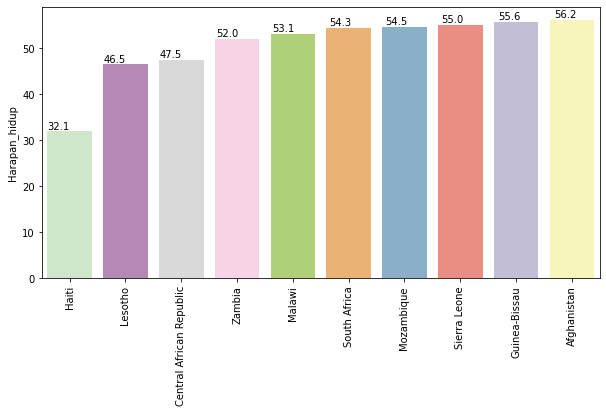

In [ ]:
visualize_country('Harapan_hidup')

**Pembahasan:** <br>
Output di atas menampilkan 10 data negara dengan `Harapan_hidup` yang rendah.

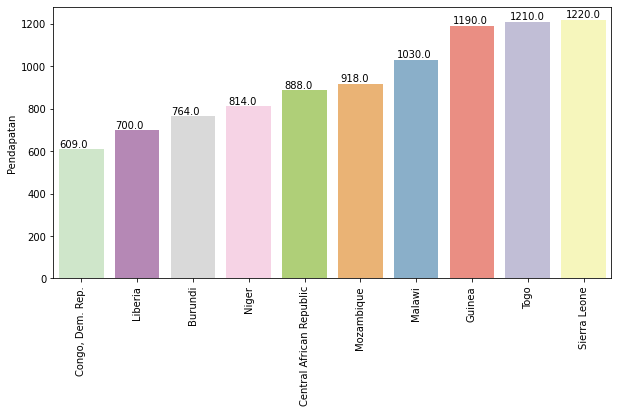

In [ ]:
visualize_country('Pendapatan')

**Pembahasan:** <br>
Output di atas menampilkan 10 data negara dengan `Pendapatan` yang rendah.

# Data Preparation
## Handle Outliers
Dikarenakan sudah terpilih 2 variabel yang akan menjadi dasar analisis dan proses clustering. Maka akan dilakukan penanganan outlier terhadap 2 variabel tersebut. Namun perlu diingat bahwa penghapusan outlier akan mengubah peringkat beberapa negara bahkan kemungkinan besar akan menghapus negara yang layak untuk mendapatkan bantuan. Di sisi yang lain, jika tidak dilakukan penanganan outlier maka dapat berdampak buruk pada model clustering nantinya. Sebab, kehadiran outlier dapat mengubah posisi centroid dari cluster. Sehingga, dibandingkan harus menghapus outlier, akan dilakukan pengubahan **Percentile Capping (Winsorization)** yaitu mengubah nilai yang kurang dari percentile 1% menjadi nilai dari percentile 1% tersebut dan mengubah nilai yang lebih dari percentile 99% menjadi nilai dari percentile 99% tersebut.

In [ ]:
df_selected = df.copy()[['Harapan_hidup', 'Pendapatan']]

Q3 = df_selected.Pendapatan.quantile(0.99)
df_selected['Pendapatan'][df_selected['Pendapatan']>=Q3]=Q3

Q1 = df_selected.Harapan_hidup.quantile(0.01)
df_selected['Harapan_hidup'][df_selected['Harapan_hidup']<=Q1]=Q1

df_selected.head()

,Harapan_hidup,Pendapatan
0,56.2,1610.0
1,76.3,9930.0
2,76.5,12900.0
3,60.1,5900.0
4,76.8,19100.0


**Pembahasan:** <br>
Dari visualisasi boxplot yang telah dilakukan sebelumnya dapat diketahui bahwa outlier dari `Harapan_hidup` hanya yang kurang dari Q1 dan outlier dari `Pendapatan` hanya yang lebih dari Q3.

## The Hopkins Statistic
Merupakan cara untuk mengukur apakah data yang ada cenderung berkelompok dalam dataset. Hasil dari statistik ini adalah sebagai berikut:
- Nilai yang mendekati `1` cenderung menunjukkan data benar-benar cocok dikelompokkan.
- Nilai yang mendekati `0.5` cenderung menunjukkan data tersebut merupakan data acak.
- Nilai yang mendekati `0` cenderung menunjukkan data tersebut merupakan data berdistribusi seragam.

In [ ]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
# lihat skor hopkins
round(hopkins(df_selected), 2)

0.86

**Pembahasan:** <br>
Hasil di atas menunjukkan bahwa data benar-benar cocok untuk dikelompokkan.

## Data Scaling
Proses ini dilakukan supaya skala antar variabel itu sama sehingga tidak ada variabel yang lebih dominan dibanding variabel lainnya.

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# buat dataframe dari nilai yang telah di-standardisasi
df_scaled = pd.DataFrame(data=df_scaled, columns=['Harapan_hidup', 'Pendapatan'])
df_scaled.head()

,Harapan_hidup,Pendapatan
0,-1.693071,-0.851668
1,0.662026,-0.386946
2,0.685460,-0.221053
3,-1.236112,-0.612045
4,0.720610,0.125254


# Modeling
Pada modeling akan dilakukan percobaan menggunakan 3 (tiga) algoritma clustering yaitu K-Means, Hierarchical Clustering, dan DBSCAN.

## Elbow Method
Merupakan metode untuk menentukan jumlah cluster yang optimal untuk digunakan.

In [ ]:
def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k)
        model.fit(X)
        result.append(model.inertia_)
        
    sns.set()
    fig, ax = plt.subplots(figsize=(15,8))
    
    ax.plot(K_range, result, marker='o')
    
    for i, value in enumerate(result):
        ax.text(i+1.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range)
    plt.grid()
    plt.title('Elbow Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('WCSS\n', fontsize=15)
    
    if save==True:
        plt.savefig('elbowMethod.png', dpi=200)
    
    plt.show()

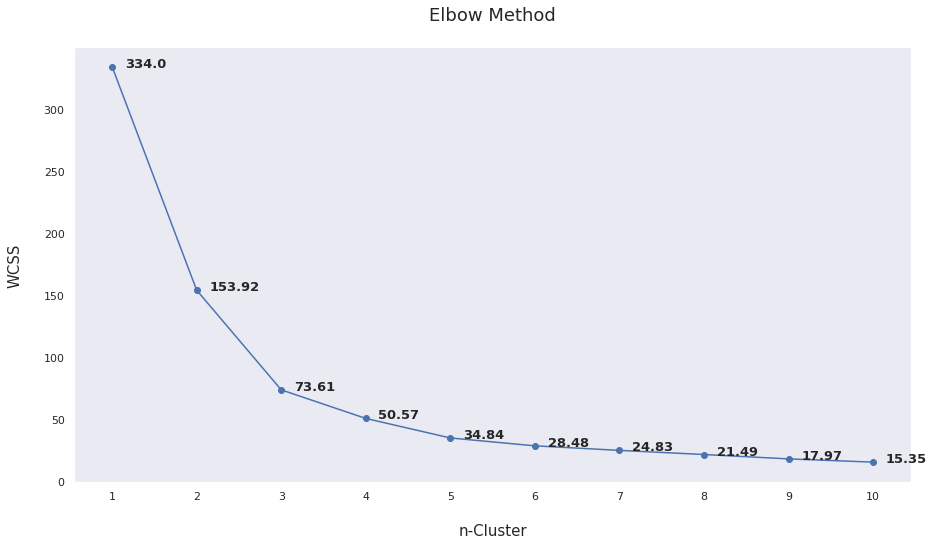

In [ ]:
elbowMethod(df_scaled)

**Pembahasan:** <br>
Dapat dilihat dari output di atas bahwa jumlah cluster yang optimal sebesar `3` karena penurunan inersia pada jumlah cluster seterusnya tidak lagi signifikan (perubahannya nilainya kecil).

## Silhouette Score Method
Merupakan metode untuk menentukan ketepatan terhadap jumlah cluster yang digunakan.

In [ ]:
def silMethod(X, k_min=2, k_max=10, save=False):
    K_range2 = range(k_min,k_max+1)

    result_sm = []
    for k in K_range2:
        model2 = KMeans(n_clusters = k)
        model2.fit(X)
        labels = model2.labels_
    
        s_score = silhouette_score(X, labels, metric='euclidean')
        result_sm.append(s_score)
        
    fig2, ax2 = plt.subplots(figsize=(15,8))
    ax2.plot(K_range2, result_sm, marker='o')
    
    for i, value in enumerate(result_sm):
        ax2.text(i+2.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range2)
    plt.grid()
    plt.title('Silhouette Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('Silhouette Score\n', fontsize=15)
    if save==True:
        plt.savefig('silMethod.png', dpi=200)
    plt.show()

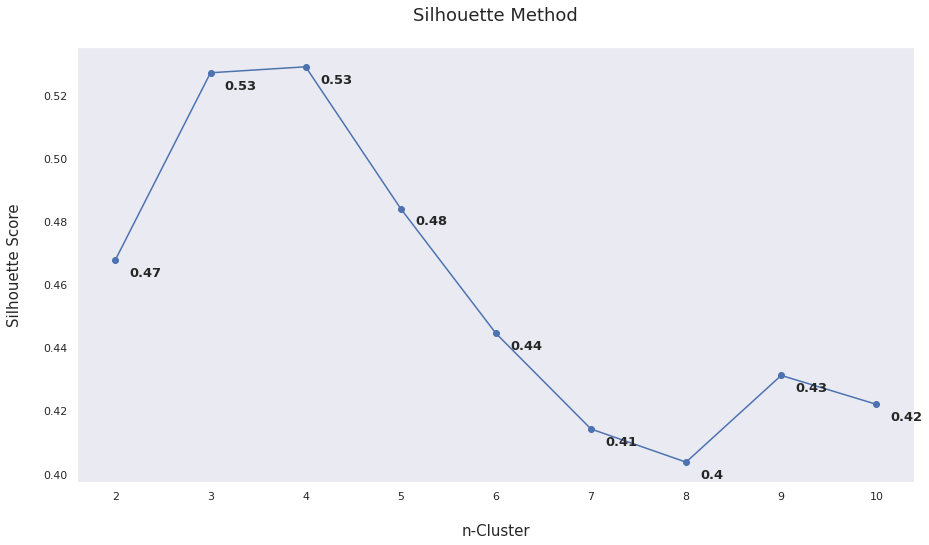

In [ ]:
silMethod(df_scaled)

**Pembahasan:** <br>
Dapat dilihat dari output di atas bahwa nilai ketepatan terhadap jumlah cluster yang digunakan yaitu `3` sudah sesuai dan cocok dengan hasil yang didapatkan dari elbow method.

## K-Means
Algoritmanya:
1. Inisialisasi jumlah cluster awal (bisa random atau pilih k=2). K adalah parameter yang mewakilkan angka dari cluster di mana data points akan dilakukan pengelompokan terhadap jumlah cluster yang ditentukan.
2. Tentukan posisi centroid secara random.
3. Hitung jarak antara data point ke centroid. Data point akan dianggap bagian dari cluster dengan centroid terdekatnya. Perhitungan jarak antara data point ke centroid menggunakan formula Euclidean Distance. 
4. Kemudian hitung ulang centroid berdasarkan label data didapatkan. Disini dibuat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
5. Kemudian dilakukan kembali tahap `3` dan dicek apakah ada perubahan dalam cluster atau tidak, jika ada maka dilakukan perulangan sebagaimana tahap `4` sampai posisi centroid tidak berubah lagi. 

In [ ]:
# buat model kmeans dengan nilai k=3
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_scaled)

# masukkan label ke dataframe
df['label'] = kmeans.labels_

df.label.value_counts()

2    77
0    52
1    38
Name: label, dtype: int64

In [ ]:
def visualize_cluster(x, y, df=df, label='label'):
  fig, ax = plt.subplots(figsize=(12,8))

  # komponen warna untuk tiap cluster
  colorDict = {0:'#80B1D3', 1:'#FB8072', 2:'#BC80BD'}

  # gunakan tema default yaitu darkgrid
  sns.set()

  # plot hasil clustering
  ax.scatter(df[x], df[y], s=df['Jumlah_fertiliti']*100,
            c=df[label].map(colorDict), alpha=0.75, zorder=2, edgecolor='white')

  # tambah label x dan y
  ax.set_xlabel(f'\n{x}', fontsize=15, weight='bold')
  ax.set_ylabel(f'{y}\n', fontsize=15, weight='bold')

  # buat marker objek
  markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

  # menambahkan leend
  plt.legend(markers, list(colorDict.keys())[:3], prop={'size':13},
            title='Cluster\n', title_fontsize=14)

  plt.show()

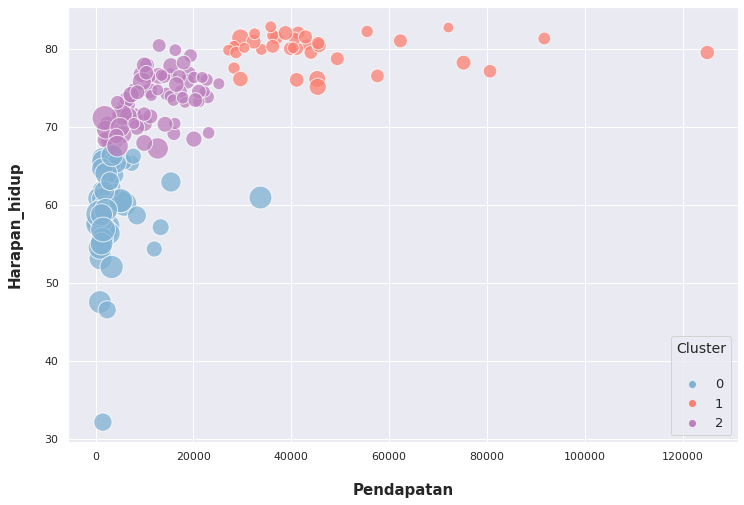

In [ ]:
# visualisasi hasil clustering
visualize_cluster(x='Pendapatan', y='Harapan_hidup')

**Pembahasan:** <br>
Dari hasil visualisasi scatter di atas bahwa terdapat 3 cluster yang menjadi kelompok negara-negara yang ada. Ketiga kelompok tersebut dapat dibagi menjadi:
0. Negara Terbelakang (Pendapatan dan harapan hidup yang relatif rendah)
1. Negara Maju (Pendapatan relatif tinggi dan harapan hidup relatif tinggi)
3. Negara Berkembang (Pendapatan relatif rendah namun harapan hidup cukup tinggi)

In [ ]:
df[df.Negara == 'Indonesia']

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
70,Indonesia,33.3,755.73,81.171,696.64,8430,15.3,69.9,2.48,3110,2


**Pembahasan:** <br>
Hasil cluster yang dilakukan dengan K-Means sudah sesuai dengan realita bahwa Indonesia memang termasuk negara yang berkembang.

In [ ]:
insight = df.groupby('label').mean()

insight

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
label,,,,,,,,,
0,85.936538,904.591960,112.496675,902.548886,3895.442308,10.785673,59.500000,4.653654,1910.115385
1,5.710526,25685.834211,3602.516053,21499.513158,45771.052632,3.754737,79.905263,1.840526,41155.263158
2,22.148052,2807.050203,438.039065,3069.360519,11964.935065,7.740662,73.407792,2.342597,6516.727273


**Pembahasan:** <br>
Dilakukan grouping untuk mendapatkan insight terkait rata-rata nilai variabel dari masing-masing cluster. Untuk mempermudah keterbacaan dan mendapatkan insight lebih baik, dapat digunakan visualisasi pembanding yaitu barplot seperti langkah berikut ini.

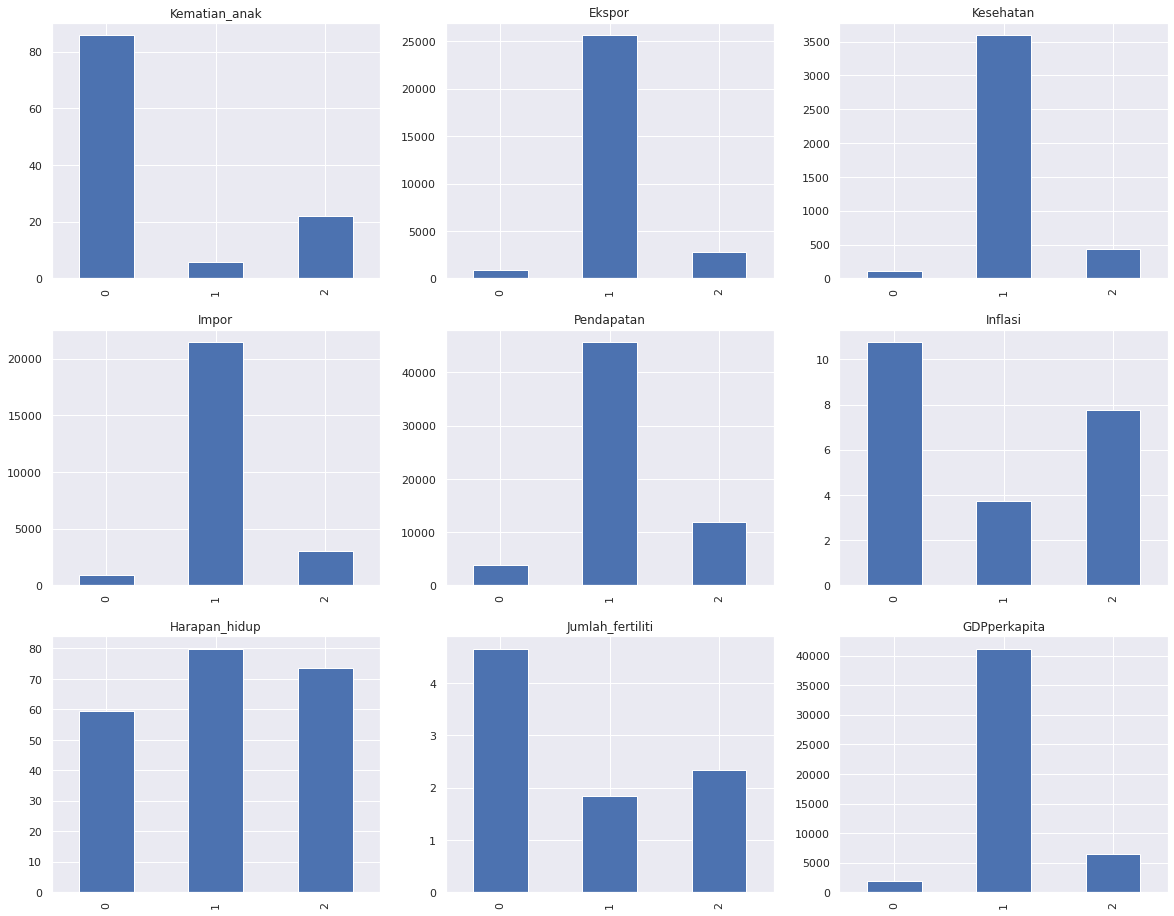

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,16))
ax = ax.flatten()

for i in range(len(insight.columns)):
  insight[insight.columns[i]].plot.bar(ax=ax[i])
  ax[i].set_title(insight.columns[i])
  ax[i].set_xlabel('')

plt.show()

**Pembahasan:** <br>
Dari hasil barplot untuk tiap variabel yang ada terhadap hasil cluster dapat memperkuat bahwa label `0` memang merupakan negara terbelakang dengan rincian sebagai berikut:
- Negara dengan kematian anak tertinggi.
- Negara dengan nilai ekspor terendah.
- Negara dengan nilai kesehatan terendah.
- Negara dengan nilai impor terendah.
- Negara dengan pendapatan terendah.
- Negara dengan nilai inflasi tertinggi.
- Negara dengan harapan hidup terendah.
- Negara dengan jumlah fertiliti tertinggi.
- Negara dengan GDP terendah.

In [ ]:
selected = df[df['label'] == 0]

selected = selected.sort_values(['GDPperkapita','Pendapatan','Harapan_hidup'], ascending=[True,True,True]).head(5)

selected

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0


**Pembahasan:** <br>
Disini dilakukan filtering terhadap 5 negara terbelakang yang paling membutuhkan bantuan keuangan yang diurutkan atas dasar nilai GDP, Pendapatan, dan Harapan Hidup yang terendah. Kenapa hanya ketiga nilai variabel itu saja? Sebab GDP sendiri berelasi kuat dengan variabel `Impor`, `Eskpor`, dan `Kesehatan`. Begitu juga dengan Harapan Hidup yang berelasi kuat dengan variabel `Kematian_anak` dan `Jumlah_fertiliti`. Pengurutan pada kasus yang dilakukan ini memprioritaskan pada faktor ekonominya terlebih dahulu baru faktor kesehatannya. Perbedaan prioritas akan menghasilkan hasil yang berbeda pula, ini kembali ke sudut pandang masing-masing.

In [ ]:
def visualize_multiple_country(y, x='Negara', df=df):
  fig, ax = plt.subplots(ncols=3, figsize=(20,5))
  ax = ax.flatten()
  
  for i in range(len(y)):
    sns.barplot(x=x, y=y[i], data=df, palette='Set3_r', ax=ax[i])
    for p in ax[i].patches:
        ax[i].annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax[i].tick_params(labelrotation=90)
    ax[i].set(xlabel = '', ylabel=f'{y[i]}\n')
  plt.show()

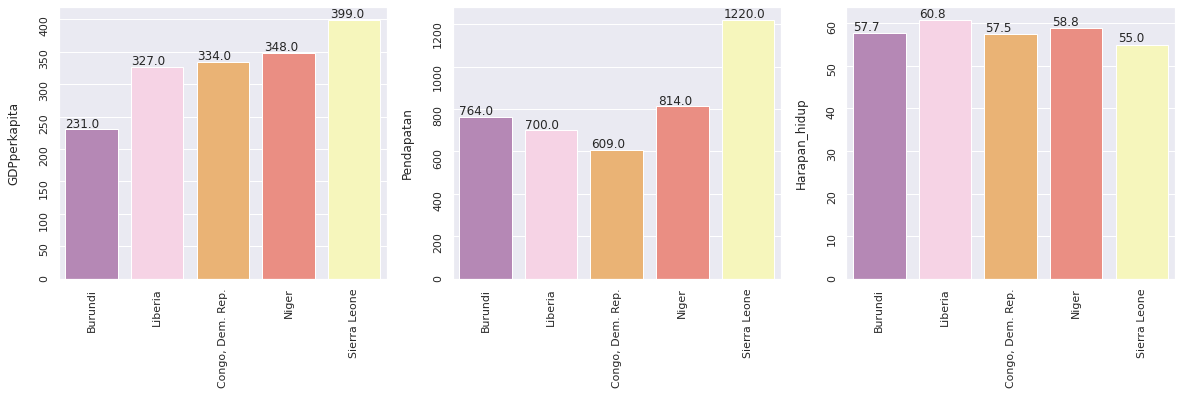

In [ ]:
visualize_multiple_country(y=['GDPperkapita', 'Pendapatan', 'Harapan_hidup'], df=selected)

**Pembahasan:** <br>
Dari hasil 5 negara yang paling membutuhkan bantuan, dilakukan visualisasi pembanding dengan barplot terhadap tiap variabel yang menjadi prioritas pengurutannya tadi yaitu nilai GDP, Pendapatan, dan Harapan Hidup.

## Hierarchical Clustering
Algoritma Hierarchical Clustering yang digunakan disini adalah Agglomerative Clustering. Algoritmanya:
1. Buat cluster sebanyak jumlah data point untuk masing-masing data point.
2. Hitung Proximity Matrix, yaitu tabel yang berisi jarak antar cluster.
3. Gabung 2 (dua) cluster yang dekat.
4. Perbarui Proximity Matrix dengan penggabungan yang telah dilakukan.
5. Ulangi tahap 3 hingga menjadi satu cluster yang utuh.

Pada algoritma ini digunakan complete-linkage. Maksudnya adalah perhitungan jarak antar cluster dilakukan dengan jarak maksimum data point antar cluster tersebut. Untuk perhitungan jarak sendiri menggunakan Euclidean Distance supaya sama rata dengan algoritma clustering lainnya juga.

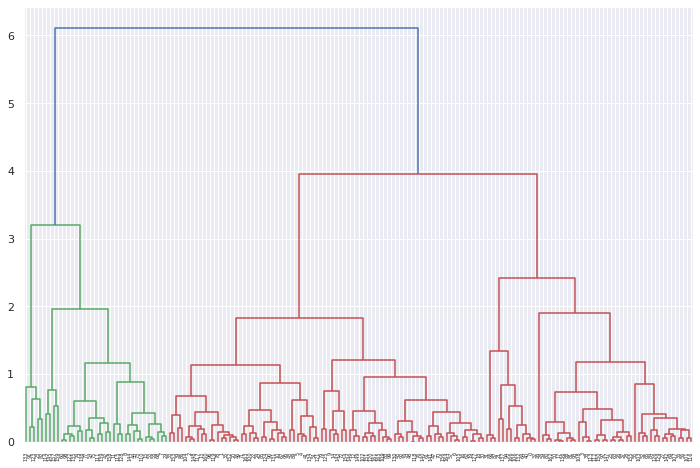

In [ ]:
plt.figure(figsize = (12,8))

# agglomerative clustering dengan complete-linkage
mergings = linkage(df_scaled, method='complete', metric='euclidean')

# menampilkan dendogram hasil clustering
dendrogram(mergings)
plt.show()

In [ ]:
# mengingat jumlah cluster optimal = 3, maka fondasi clustering yang digunakan juga ambil nilai 3
labels = cut_tree(mergings, n_clusters=3).reshape(-1, )

df_hierarchy = df.copy()
df_hierarchy['label'] = labels

df_hierarchy['label'].value_counts()

1    79
0    52
2    36
Name: label, dtype: int64

**Pembahasan:** <br>
Hasil clusteringnya hampir sama dengan K-Means, sehingga kemungkinan besar hasil setelahnya juga pasti hampir sama.

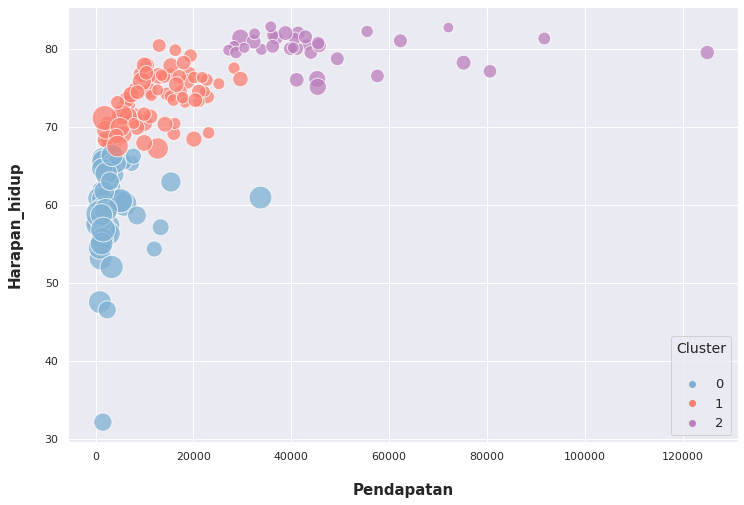

In [ ]:
# visualisasi hasil clustering
visualize_cluster(x='Pendapatan', y='Harapan_hidup', df=df_hierarchy)

In [ ]:
insight = df_hierarchy.groupby('label').mean()

insight

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
label,,,,,,,,,
0,85.936538,904.591960,112.496675,902.548886,3895.442308,10.785673,59.500000,4.653654,1910.115385
1,21.840506,3001.879311,452.642127,3213.785570,12394.936709,7.706342,73.493671,2.332911,6755.544304
2,5.472222,26529.336111,3746.274722,22206.477778,46705.555556,3.608611,80.077778,1.833889,42555.555556


**Pembahasan:** <br>
Hasilnya masih sama yaitu label `0` untuk negara terbelakang yang membutuhkan bantuan.

In [ ]:
selected = df_hierarchy[df_hierarchy['label'] == 0]

selected = selected.sort_values(['GDPperkapita','Pendapatan','Harapan_hidup'], ascending=[True,True,True]).head(5)

selected

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0


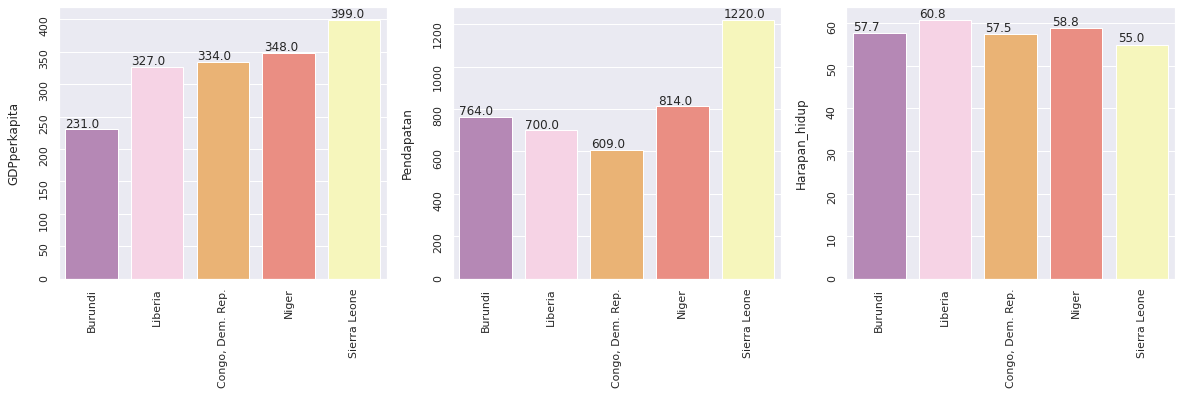

In [ ]:
visualize_multiple_country(y=['GDPperkapita', 'Pendapatan', 'Harapan_hidup'], df=selected)

## DBSCAN
DBSCAN merupakan kepanjangan dari Density-based Spatial Clustering of
Applications with Noise. Kategori noise pada algoritma DBSCAN adalah data point dengan kepadatan yang sedikit. Jika algoritma K-Means cenderung mengelompokkan semua data point ke beberapa cluster, algoritma DBSCAN dapat memisahkan data point yang tidak terpilih ke dalam kategori outlier.

Adapun 2 (dua) parameter yang menjadi dasar dala pengategorian algoritma DBSCAN adalah:
- R (Radius), yaitu jangkauan yang menjadi area padat jika terdapat sejumlah data point di dalamnya.
- M (Min),  yaitu jumlah data poin minimum di dalam satu area yang dibutuhkan untuk dikategorikan sebagai satu area padat.

Algoritmanya:
1. Pilih poin secara acak.
2. Kategorikan antara poin inti, poin tepi, dan poin outlier.
3. Ulangi langkah 1 dan 2 hingga semua poin sudah dikategorikan.
4. Menentukan jumlah cluster berdasarkan poin inti:
  - Jika dalam jangkauan satu radius memiliki satu poin inti maka poin inti
beserta seluruh poin tepi terkait digabungkan menjadi satu cluster.
  - Jika terdapat lebih dari satu poin inti yang memiliki jarak dekat (dalam
jangkauan radius) maka semua poin-poin inti berikut seluruh poin
tepi terkait digabungkan menjadi satu cluster.

In [ ]:
db = DBSCAN(eps=0.225, min_samples=10).fit(df_scaled)

labels = db.labels_

# melihat jumlah cluster yang dihasilkan
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

**Pembahasan:** <br>
Parameter yang dibutuhkan dalam pengategorian DBSCAN adalah R dan M. R atau Radius dalam kodingan sendiri direpresentasikan oleh parameter `eps` dan M atau Min dalam kodingan direpresentasikan oleh parameter `min_samples`.

In [ ]:
df_scan = df.copy()

df_scan['label'] = labels

df_scan.label.value_counts()

 1    78
-1    50
 0    29
 2    10
Name: label, dtype: int64

Labels `-1` di atas merupakan outlier yang terdeteksi oleh algoritma sehingga tidak dikelompokkan menjadi cluster tertentu.Labels `-1` di atas merupakan outlier yang terdeteksi oleh algoritma sehingga tidak dikelompokkan menjadi cluster tertentu.

In [ ]:
df_scan = df.copy()

df_scan['label'] = labels

df_scan.label.value_counts()

 1    78
-1    50
 0    29
 2    10
Name: label, dtype: int64

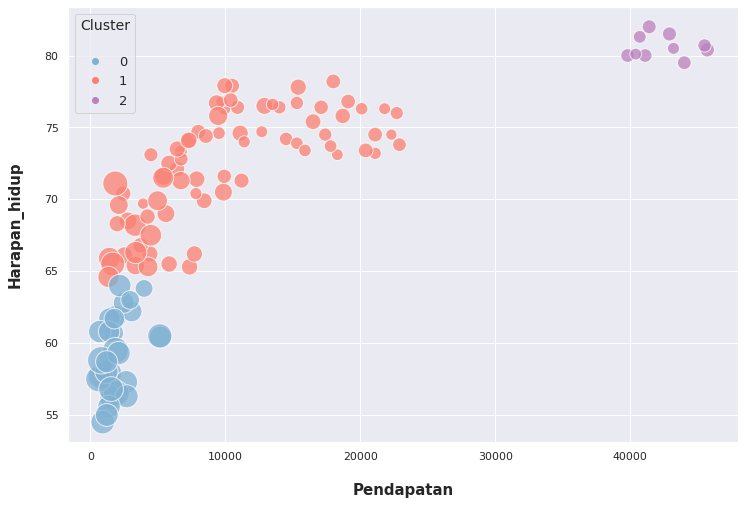

In [ ]:
visualize_cluster(x='Pendapatan', y='Harapan_hidup', df=df_scan[df_scan.label != -1])

In [ ]:
insight = df_scan[df_scan.label != -1].groupby('label').mean()

insight

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
label,,,,,,,,,
0,92.627586,326.011103,54.666376,424.045138,1991.896552,11.277069,59.303448,5.238276,937.620690
1,27.773077,2267.575122,362.730104,2629.131514,10027.179487,7.749333,72.361538,2.552051,5462.641026
2,4.220000,25734.890000,5087.103000,23452.170000,42470.000000,0.973100,80.600000,1.781000,48770.000000


**Pembahasan:** <br>
Hasilnya masih sama yaitu label `0` untuk negara terbelakang yang membutuhkan bantuan hanya saja karena lumayan banyak negara lainnya yang dianggap sebagai outlier sehingga secara statistik rata-rata pun berubah cukup signifikan.

In [ ]:
selected = df_scan[df_scan['label'] == 0]

selected = selected.sort_values(['GDPperkapita','Pendapatan','Harapan_hidup'], ascending=[True,True,True]).head(5)

selected

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0


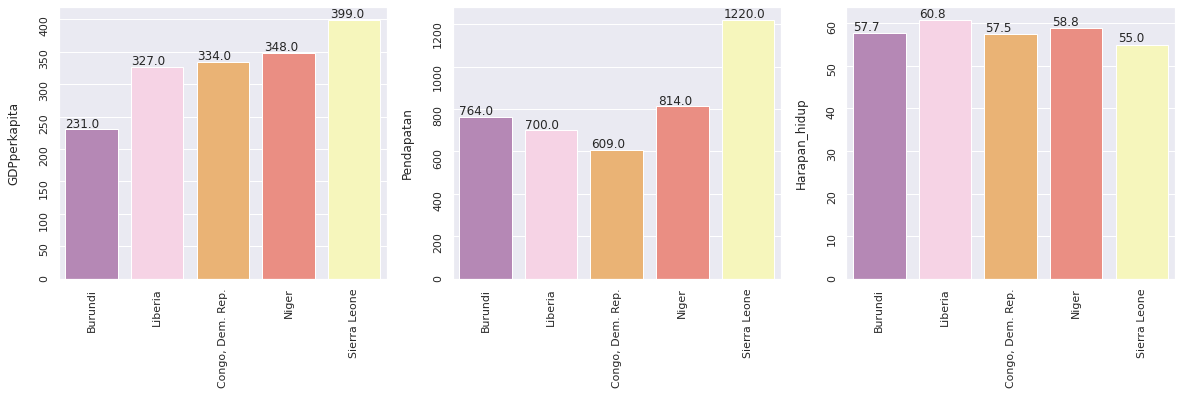

In [ ]:
visualize_multiple_country(y=['GDPperkapita', 'Pendapatan', 'Harapan_hidup'], df=selected)